### Q1) CHECKING ACCURACIES FOR DIFFERENT MODELS BY USING TITANIC DATASET

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [66]:
data=sns.load_dataset("titanic")


In [67]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Preprocessing data

In [68]:
cols=["sex","embarked","class","who","adult_male","embark_town","alive","alone","deck"]

In [69]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
for i in cols:
    data[i]=le1.fit_transform(data[i])
data
results={} # Storing results of accuracy in this dictionary 



In [98]:
data=data.dropna() #this helps us in dropping values which have atleast one missing value i.e. nan


In [71]:

x=data.iloc[:,:-1] #fetches all rows and columns except the last column
y=data.iloc[:,-1] #fetches only the last column which is the output column in this case alone 


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=69)  #creating training and testing values


### Applying Logistic Regression 


In [73]:
x_train


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
592,0,3,1,47.00,0,0,7.2500,2,2,1,1,7,2,0
889,1,1,1,26.00,0,0,30.0000,0,0,1,1,2,0,1
59,0,3,1,11.00,5,2,46.9000,2,2,0,0,7,2,0
867,0,1,1,31.00,0,0,50.4958,2,0,1,1,0,2,0
631,0,3,1,51.00,0,0,7.0542,2,2,1,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1,3,1,22.00,0,0,7.2250,0,2,1,1,7,0,1
755,1,2,1,0.67,1,1,14.5000,2,1,0,0,7,2,1
777,1,3,0,5.00,0,0,12.4750,2,2,0,0,7,2,1
252,0,1,1,62.00,0,0,26.5500,2,0,1,1,2,2,0


In [74]:
y_train

592    1
889    1
59     0
867    1
631    1
      ..
553    1
755    0
777    1
252    1
71     0
Name: alone, Length: 499, dtype: int64

### Performing EDA on data


In [75]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     714 non-null    int64  
 1   pclass       714 non-null    int64  
 2   sex          714 non-null    int64  
 3   age          714 non-null    float64
 4   sibsp        714 non-null    int64  
 5   parch        714 non-null    int64  
 6   fare         714 non-null    float64
 7   embarked     714 non-null    int64  
 8   class        714 non-null    int64  
 9   who          714 non-null    int64  
 10  adult_male   714 non-null    int64  
 11  deck         714 non-null    int64  
 12  embark_town  714 non-null    int64  
 13  alive        714 non-null    int64  
 14  alone        714 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 89.2 KB
None


In [76]:
print(data.describe())


         survived      pclass         sex         age       sibsp       parch  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000   
mean     0.406162    2.236695    0.634454   29.699118    0.512605    0.431373   
std      0.491460    0.838250    0.481921   14.526497    0.929783    0.853289   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    2.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

             fare    embarked       class         who  adult_male        deck  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000   
mean    34.694514    1.599440    1.236695    1.189076    0.578431    5.810924   
std     52.918930    0.7814

In [77]:
print(data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


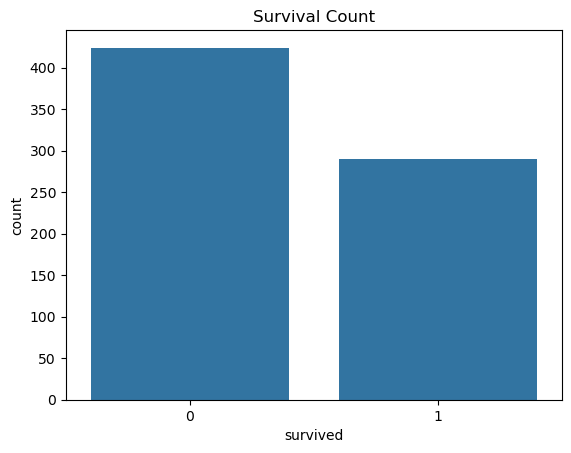

In [78]:
sns.countplot(x='survived',data=data)
plt.title('Survival Count')
plt.show()


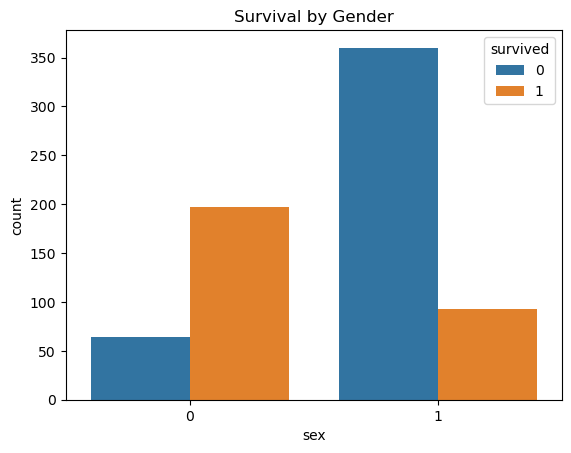

In [79]:
sns.countplot(x='sex',hue='survived',data=data)
plt.title('Survival by Gender')
plt.show()

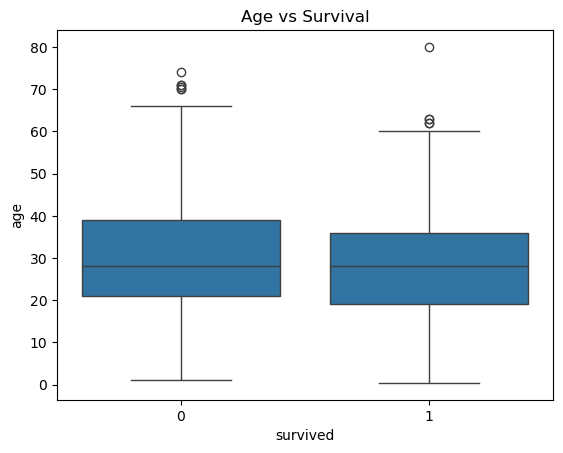

In [80]:
sns.boxplot(x='survived',y='age',data=data)
plt.title('Age vs Survival')
plt.show()

### Logistic Regreession 


In [83]:
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression(max_iter=1000) #setting max iters solves the warning of getting max no. of iterations 
logi_model.fit(x_train,y_train)
y_pred_lr = logi_model.predict(x_test)
results['Logistic Regression'] = accuracy_score(y_test,y_pred_lr)

### Decision Tree

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.5\ngini = 0.489\nsamples = 499\nvalue = [213, 286]'),
 Text(0.4, 0.5, 'x[5] <= 0.5\ngini = 0.215\nsamples = 326\nvalue = [40, 286]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 286\nvalue = [0, 286]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 173\nvalue = [173, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

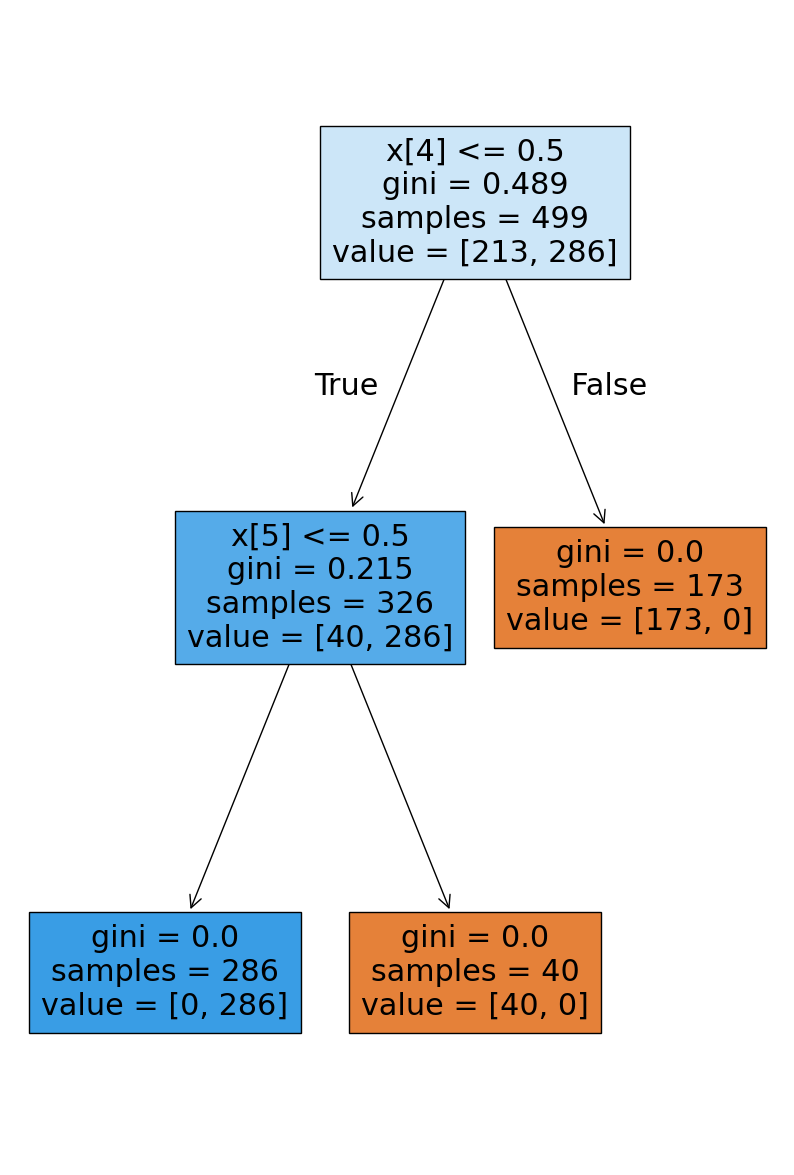

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt_model,filled=True)

### KNN Algorithm

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

### SVM Algorithm 

In [94]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
results['SVM'] = accuracy_score(y_test, y_pred_svm)

In [95]:
print("\nModel Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Model Accuracies:
Logistic Regression: 1.0000
Decision Tree: 1.0000
KNN: 0.8326
SVM: 0.7907


### Generating Graphs for accuracies for better comparison 

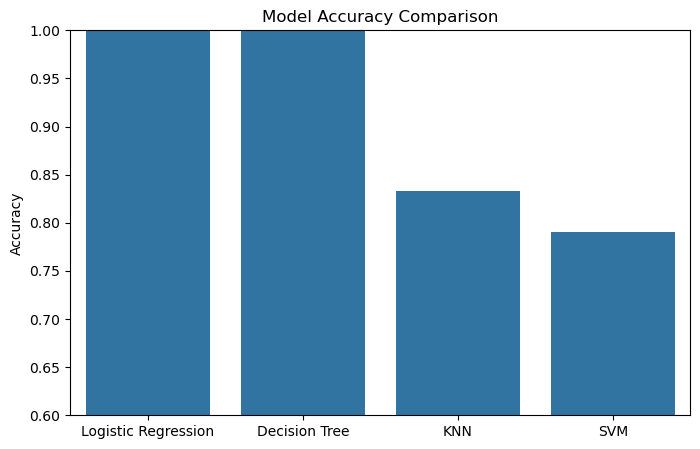

In [97]:

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.6,1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

### Importing moon dataset and performing Kmeans Data Clustering on it 

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
x,y_true=make_moons(n_samples=300,noise=0.1,random_state=42)

Text(0, 0.5, 'X2')

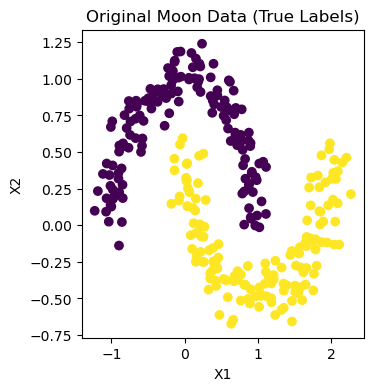

In [101]:

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y_true, cmap='viridis')
plt.title("Original Moon Data (True Labels)")
plt.xlabel("X1")
plt.ylabel("X2")
#original data is being visualized before performing Kmeans clustering


In [116]:
#Performing Kmeans clustering operation
import warnings  #imported to ignore warning which disturb the normal flow of programs
warnings.filterwarnings('ignore')

kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

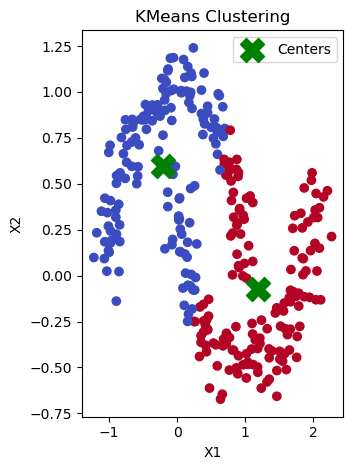

In [117]:
# visualizing the kmean result
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='green', marker='X', label='Centers')
plt.title("KMeans Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
#A scatter plot of 200 moon-shaped points.
#Each point is colored by the cluster label predicted by KMeans.
#Two large black X markers show the center of each cluster.